<a href="https://colab.research.google.com/github/mzaman202006/DA_project/blob/main/LIWC_DAProject_with_Lemmitization_Stemming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive"

 1248.rar
'202006_Mariya_Quiz2_DL (1).pdf'
 202006_Mariya_Quiz2_DL.pdf
 2021-02-07-22-17-d3cbf5dee3106dffeb1584bc364f8613.pdf
 Attach_5129992_1.pdf
 Classroom
'Colab Notebooks'
'Copy of NSP.pdf'
'CSE 6207 (N) : Data Analytics'
'[FreeCourseSite.com] Udemy - IELTS Band 7+ Complete Prep Course.rar'
 htdocs.rar
 IMDB_N4.xlsx
'Interim report presentation (1).pptx'
'Interim report presentation.gslides'
'Interim report presentation.pptx'
 IOT-Maria
'no need.rar'
 NSP.pdf
 NurseSchedulingProblem.pdf
'OFc docsto drive.rar'
 OfficePC.rar
 Project.rar
 std_2021.rar
 Tutorial.rar


In [ ]:
# Loading NLTK module
import nltk
# downloading punkt
nltk.download('punkt')
# downloading stopwords
nltk.download('stopwords')
# downloading wordnet
nltk.download('wordnet')
# downloading average_perception_tagger
nltk.download('averaged_perceptron_tagger')
import spacy
import re,string,unicodedata
from nltk.tokenize import sent_tokenize
from nltk.stem import LancasterStemmer,WordNetLemmatizer
import string
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import re
import spacy
from nltk.corpus import sentiwordnet as swn
from IPython.display import clear_output
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly
plotly.offline.init_notebook_mode (connected = True)
from nltk.corpus import stopwords
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.



In [ ]:
data_df = pandas.read_excel('/content/drive/MyDrive/CSE 6207 (N) : Data Analytics/Final/Data/IMDB.xlsx', sheet_name='All')
data_df['REVIEW'] =  data_df['REVIEW'].str.lower()
data_df['SENTIMENT'].replace({'Positive': 1, 'Negative': 2,'Neutral':3}, inplace=True)

#Processing

In [ ]:
Edited_Review = data_df['REVIEW'].copy()
data_df['Cleaned'] = Edited_Review

In [ ]:
def pre_process(text):
    # lowercase
    text = text.lower()
    # tags
    text = re.sub('&lt;/?.*?&gt;',' &lt;&gt; ',text)
    # special characters and digits
    text=re.sub('(\\d|\\W)+',' ',text)
    # remove punctuation
    text = re.sub('[.;:!\'?,\"()\[\]]', '', text)
   # text = [REPLACE.sub('', line) for line in text]
    
    return text

data_df['Cleaned'] = data_df['Cleaned'].apply(lambda x:pre_process(x))

In [ ]:
Edited_Review = data_df['Cleaned'].copy()
data_df['Stopwprd'] = Edited_Review

In [ ]:
#english_stop_words = stopwords.words('english')
english_stop_words = ENGLISH_STOP_WORDS
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split() 
                      if word not in english_stop_words])
        )
    return removed_stop_words

data_df['Stopwprd'] = remove_stop_words(data_df['Stopwprd'])

In [ ]:
print(data_df['REVIEW'][1])
print(data_df['Cleaned'][1])
print(data_df['Stopwprd'][1])

well, i've always known i was a little slow to the party but this movie was hard to follow! it might have been the cinema sound mix but my wife and i kept asking each other what they were saying.. the script was hard to hear let alone understand in its abstract form.. we got the gist of the concept but was still hard to piece everything together in the end! i think it's a movie that requires a few watches to wrap ya head round it, but then again i am a little slow.. lol
well i ve always known i was a little slow to the party but this movie was hard to follow it might have been the cinema sound mix but my wife and i kept asking each other what they were saying the script was hard to hear let alone understand in its abstract form we got the gist of the concept but was still hard to piece everything together in the end i think it s a movie that requires a few watches to wrap ya head round it but then again i am a little slow lol
ve known little slow party movie hard follow cinema sound mi

In [ ]:
Edited_Review = data_df['Stopwprd'].copy()
data_df['Stem'] = Edited_Review

In [ ]:
# Stemming
from nltk.stem.porter import PorterStemmer

def get_stemmed_text(corpus):
    stemmer = PorterStemmer()
    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

data_df['Stem']  = get_stemmed_text(data_df['Stem'] )

In [ ]:
print(data_df['REVIEW'][49])
print(data_df['Cleaned'][49])
print(data_df['Stopwprd'][49])
print(data_df['Stem'][49])

aaron sorkin's second feature gives us a spectacular film that is bound to be up for numerous awards. the movie starts slows but as it gains momentum the drama becomes more intriguing and exciting. before going into a sorkin movie you expect great dialogue but that does not make it any less impressive. the movie really shines when the trial is cut together with scenes from the streets of chicago. the entire ensemble cast shines as more of their character is revealed as the story goes on. overall the film packs the punch with political messaging needed in the divisive time of today. it is another great achievement for the esteemed writer.
aaron sorkin s second feature gives us a spectacular film that is bound to be up for numerous awards the movie starts slows but as it gains momentum the drama becomes more intriguing and exciting before going into a sorkin movie you expect great dialogue but that does not make it any less impressive the movie really shines when the trial is cut togethe

In [ ]:
Edited_Review = data_df['Stem'].copy()
data_df['Lem'] = Edited_Review

In [ ]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
def get_lemmatized_text(corpus):
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

data_df['Lem'] = get_lemmatized_text(data_df['Lem'])

In [ ]:
print(data_df['REVIEW'][1])
print(data_df['Cleaned'][1])
print(data_df['Stopwprd'][1])
print(data_df['Stem'][1])
print(data_df['Lem'][1])

well, i've always known i was a little slow to the party but this movie was hard to follow! it might have been the cinema sound mix but my wife and i kept asking each other what they were saying.. the script was hard to hear let alone understand in its abstract form.. we got the gist of the concept but was still hard to piece everything together in the end! i think it's a movie that requires a few watches to wrap ya head round it, but then again i am a little slow.. lol
well i ve always known i was a little slow to the party but this movie was hard to follow it might have been the cinema sound mix but my wife and i kept asking each other what they were saying the script was hard to hear let alone understand in its abstract form we got the gist of the concept but was still hard to piece everything together in the end i think it s a movie that requires a few watches to wrap ya head round it but then again i am a little slow lol
ve known little slow party movie hard follow cinema sound mi

In [ ]:
words = data_df['Lem'].apply(lambda x: word_tokenize(x))
words[1]


In [ ]:
# Print list values in seperate files
i=0
for  word in  data_df['Stopwprd']:
    i = 1+i
    with open('/content/drive/MyDrive/CSE 6207 (N) : Data Analytics/Project/'+"files/" + str(i) + ".txt", "w") as text_file:
          text_file.write(word)
drive.flush_and_unmount()

In [ ]:
import pandas as pd  
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSE 6207 (N) : Data Analytics/Final/Data/LIWC3.csv')
df.head()

,Filename,WC,WPS,Qmarks,Unique,Dic,Sixltr,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,verb,auxverb,past,present,future,adverb,preps,conj,negate,quant,number,swear,social,family,friend,humans,affect,posemo,negemo,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,SENTIMENT
0,1,159,159,0,76.10,57.86,33.33,8.18,0.63,0.0,0.0,0.0,0.0,0.0,0,0.63,0.0,13.84,3.14,2.52,10.69,0.0,2.52,0.0,0.0,0.00,1.89,0.63,0.00,4.40,0.0,0.0,1.89,8.81,6.29,2.52,0.0,0.00,0.63,17.61,6.92,2.52,3.14,3.77,2.52,0.63,0.00,0.00,7.55,1.89,4.40,1.26,1.89,1.26,0.63,0.00,0.0,8.81,2.52,1.89,4.40,0.63,1.26,6.92,0.0,0.63,0.00,0.0,0.00,0.0,0.63,Neutral
1,2,40,40,0,87.50,80.00,12.50,10.00,2.50,2.5,0.0,0.0,2.5,0.0,0,0.00,0.0,17.50,2.50,5.00,10.00,0.0,0.00,0.0,0.0,0.00,5.00,0.00,0.00,15.00,2.5,0.0,0.00,5.00,5.00,0.00,0.0,0.00,0.00,12.50,7.50,0.00,0.00,0.00,0.00,5.00,0.00,0.00,20.00,5.00,7.50,10.00,2.50,2.50,0.00,0.00,0.0,15.00,2.50,5.00,7.50,2.50,2.50,10.00,0.0,0.00,0.00,0.0,2.50,0.0,0.00,Negative
2,3,37,37,0,97.30,72.97,51.35,2.70,0.00,0.0,0.0,0.0,0.0,0.0,0,0.00,0.0,10.81,0.00,2.70,8.11,0.0,0.00,0.0,0.0,0.00,0.00,2.70,0.00,2.70,0.0,0.0,2.70,18.92,8.11,8.11,2.7,5.41,0.00,16.22,8.11,5.41,0.00,0.00,0.00,2.70,2.70,0.00,5.41,0.00,5.41,0.00,0.00,0.00,0.00,0.00,0.0,24.32,5.41,10.81,8.11,0.00,0.00,0.00,0.0,2.70,0.00,0.0,0.00,0.0,0.00,Negative
3,4,111,111,0,83.78,64.86,29.73,7.21,0.90,0.0,0.0,0.0,0.0,0.0,0,0.90,0.9,13.51,0.90,6.31,8.11,0.0,0.90,0.9,0.0,0.00,1.80,3.60,0.00,4.50,0.0,0.9,1.80,11.71,8.11,3.60,0.0,0.00,1.80,15.32,5.41,1.80,3.60,1.80,1.80,0.00,0.90,0.90,5.41,0.90,2.70,1.80,0.00,0.00,0.00,0.00,0.0,12.61,6.31,2.70,3.60,2.70,4.50,10.81,0.0,0.90,1.80,0.0,1.80,0.0,0.00,Negative
4,5,152,152,0,78.29,62.50,26.97,5.26,0.00,0.0,0.0,0.0,0.0,0.0,0,0.00,0.0,10.53,2.63,0.66,8.55,0.0,1.32,0.0,0.0,1.32,1.97,0.00,0.66,5.26,0.0,0.0,0.66,10.53,6.58,3.95,0.0,0.66,0.66,18.42,7.89,1.97,3.29,1.97,1.97,0.00,0.66,1.32,9.87,1.97,4.61,2.63,0.66,0.00,0.00,0.66,0.0,7.24,2.63,1.32,3.29,2.63,4.61,9.87,0.0,0.66,1.97,0.0,0.66,0.0,0.00,Positive


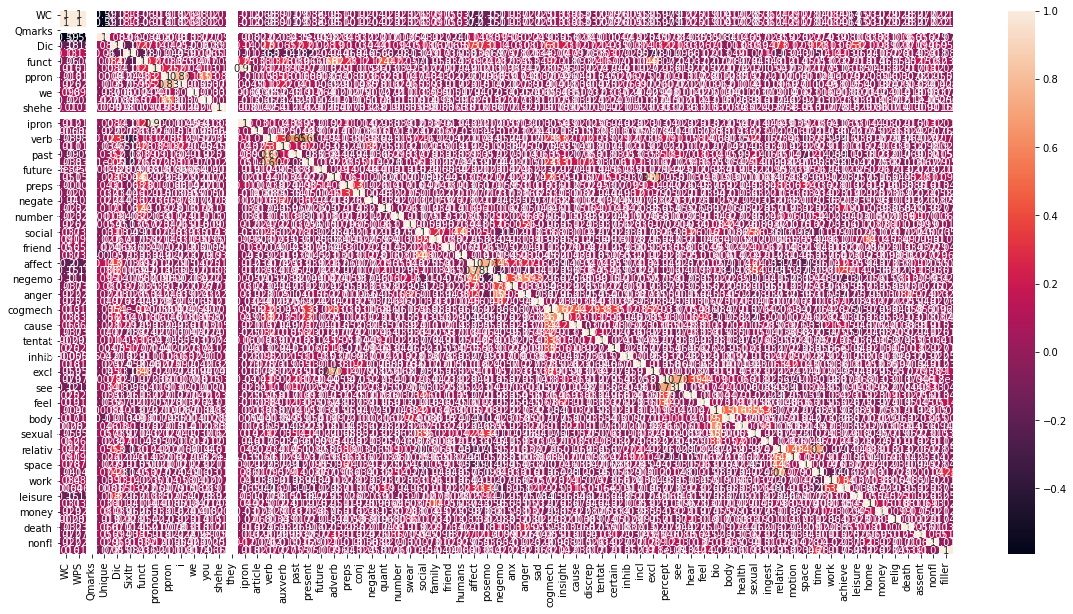

In [ ]:
#correlation matrix
correlation=df.corr()
#plotting heatmap
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True)

In [ ]:
from scipy.stats import pearsonr
import numpy as np
rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


,WC,WPS,Qmarks,Unique,Dic,Sixltr,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,verb,auxverb,past,present,future,adverb,preps,conj,negate,quant,number,swear,social,family,friend,humans,affect,posemo,negemo,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler
WC,1.0***,1.0***,nan,-0.59***,-0.18***,0.13***,-0.06**,-0.02,-0.02,-0.03,0.1***,-0.02,0.01,nan,-0.01,-0.01,-0.09***,-0.01,-0.09***,-0.04,0.0,-0.05*,-0.0,-0.02,-0.04,-0.02,-0.02,-0.03,0.04,0.09***,0.06*,0.04,-0.2***,-0.15***,-0.11***,-0.04,-0.02,-0.02,0.01,0.04,0.06**,-0.04,-0.0,0.03,-0.0,0.02,-0.06**,-0.08***,-0.12***,0.02,0.02,-0.0,0.02,0.0,-0.05*,0.06**,0.04,0.09***,0.08***,-0.04,0.08***,0.01,-0.15***,0.03,-0.03,-0.0,-0.03,-0.07**,-0.02,0.02
WPS,1.0***,1.0***,nan,-0.59***,-0.18***,0.13***,-0.06**,-0.02,-0.02,-0.03,0.1***,-0.02,0.01,nan,-0.01,-0.01,-0.09***,-0.01,-0.09***,-0.04,0.0,-0.05*,-0.0,-0.02,-0.04,-0.02,-0.02,-0.03,0.04,0.09***,0.06*,0.04,-0.2***,-0.15***,-0.11***,-0.04,-0.02,-0.02,0.01,0.04,0.06**,-0.04,-0.0,0.03,-0.0,0.02,-0.06**,-0.08***,-0.12***,0.02,0.02,-0.0,0.02,0.0,-0.05*,0.06**,0.04,0.09***,0.08***,-0.04,0.08***,0.01,-0.15***,0.03,-0.03,-0.0,-0.03,-0.07**,-0.02,0.02
Qmarks,nan,nan,nan***,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Unique,-0.59***,-0.59***,nan,1.0***,0.08***,0.06**,-0.01,-0.01,-0.0,-0.01,-0.04,0.03,0.01,nan,-0.01,-0.02,0.02,-0.03,0.04,-0.0,0.0,-0.03,0.04,0.03,0.02,0.02,0.0,0.01,-0.03,-0.03,-0.02,-0.1***,0.14***,0.09***,0.1***,0.08***,0.02,0.05,-0.04,-0.06*,-0.03,0.04,0.01,-0.0,0.04,-0.03,-0.05,0.01,0.03,-0.04,-0.04,0.0,-0.11***,0.05,0.06*,-0.02,0.06*,-0.03,-0.03,0.07**,-0.04,-0.01,-0.02,0.04,0.08***,-0.02,0.07**,0.06*,0.03,-0.08***
Dic,-0.18***,-0.18***,nan,0.08***,1.0***,-0.17***,0.27***,0.14***,0.04,0.06*,-0.01,-0.01,0.0,nan,0.14***,-0.03,0.31***,0.06**,0.2***,0.21***,0.03,0.19***,0.1***,0.03,0.04,0.1***,0.09***,0.05*,0.18***,0.07**,0.01,0.06*,0.37***,0.31***,0.14***,0.03,0.08***,0.08**,0.31***,0.23***,0.12***,0.07**,0.14***,0.04,-0.02,0.07**,0.13***,0.22***,0.18***,0.03,0.07**,0.1***,-0.01,0.08***,0.09***,0.05,0.3***,0.12***,0.09***,0.28***,0.13***,0.07**,0.32***,0.11***,0.09***,-0.03,0.07**,0.09***,0.07**,0.05*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
relig,-0.0,-0.0,nan,-0.02,-0.03,0.03,-0.05*,-0.03,-0.03,-0.03,-0.01,-0.01,0.01,nan,-0.02,0.07**,-0.0,0.04,-0.02,0.02,-0.01,-0.04,-0.01,0.01,-0.02,-0.07**,0.0,0.11***,0.02,0.03,-0.01,-0.01,-0.04,0.02,-0.08***,-0.06*,-0.01,-0.02,-0.04,-0.02,0.0,0.01,-0.07**,0.05*,-0.03,0.01,-0.06*,-0.01,-0.07**,0.13***,-0.02,0.02,-0.01,0.01,0.02,-0.01,-0.01,0.04,-0.03,-0.03,-0.06**,-0.03,0.02,0.02,0.01,1.0***,-0.0,0.01,-0.02,-0.05
death,-0.03,-0.03,nan,0.07**,0.07**,0.01,-0.05*,-0.02,-0.01,0.0,-0.02,-0.01,0.01,nan,-0.02,-0.02,-0.06**,-0.03,-0.07**,-0.02,-0.02,-0.05*,-0.01,-0.02,-0.01,-0.05*,0.09***,-0.02,-0.02,0.1***,-0.03,0.02,0.01,-0.08***,0.13***,-0.03,0.25***,0.05*,-0.06*,-0.03,-0.01,-0.02,-0.05*,0.0,-0.04,0.0,-0.02,-0.08***,-0.04,-0.03,-0.05*,-0.02,-0.02,0.04,-0.06**,-0.02,-0.02,-0.04,-0.01,0.02,0.01,-0.05*,0.11***,0.08***,0.1***,-0.0,1.0***,0.06*,-0.01,0.03
assent,-0.07**,-0.07**,nan,0.06*,0.09***,-0.04,0.15***,-0.02,-0.02,-0.02,-0.01,-0.0,-0.01,nan,-0.01,0.02,-0.0,-0.01,-0.0,0.01,-0.02,0.18***,-0.02,-0.02,-0.03,-0.0,0.17***,0.01,0.05,-0.01,-0.04,0.03,0.12***,0.13***,0.01,-0.0,0.07**,-0.05,0.05*,-0.02,-0.02,-0.04,0.03,0.12***,-0.0,-0.05,0.09***,0.05,0.01,0.06*,0.04,-0.03,-0.0

#Classify

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSE 6207 (N) : Data Analytics/Final/Data/LIWC3.csv')
df = df.iloc[: , 1:]
df.head()

,funct,pronoun,ipron,auxverb,past,present,adverb,quant,number,social,family,friend,humans,affect,posemo,negemo,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,excl,percept,hear,feel,bio,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,assent,filler,SENTIMENT
0,8.18,0.63,0.63,3.14,2.52,10.69,2.52,1.89,0.63,4.40,0.0,0.0,1.89,8.81,6.29,2.52,0.00,0.63,17.61,6.92,2.52,3.14,3.77,2.52,0.63,0.00,7.55,4.40,1.26,1.89,0.63,0.00,0.0,8.81,2.52,1.89,4.40,0.63,1.26,6.92,0.0,0.63,0.00,0.00,0.63,3
1,10.00,2.50,0.00,2.50,5.00,10.00,0.00,5.00,0.00,15.00,2.5,0.0,0.00,5.00,5.00,0.00,0.00,0.00,12.50,7.50,0.00,0.00,0.00,0.00,5.00,0.00,20.00,7.50,10.00,2.50,0.00,0.00,0.0,15.00,2.50,5.00,7.50,2.50,2.50,10.00,0.0,0.00,0.00,2.50,0.00,2
2,2.70,0.00,0.00,0.00,2.70,8.11,0.00,0.00,2.70,2.70,0.0,0.0,2.70,18.92,8.11,8.11,5.41,0.00,16.22,8.11,5.41,0.00,0.00,0.00,2.70,0.00,5.41,5.41,0.00,0.00,0.00,0.00,0.0,24.32,5.41,10.81,8.11,0.00,0.00,0.00,0.0,2.70,0.00,0.00,0.00,2
3,7.21,0.90,0.90,0.90,6.31,8.11,0.90,1.80,3.60,4.50,0.0,0.9,1.80,11.71,8.11,3.60,0.00,1.80,15.32,5.41,1.80,3.60,1.80,1.80,0.00,0.90,5.41,2.70,1.80,0.00,0.00,0.00,0.0,12.61,6.31,2.70,3.60,2.70,4.50,10.81,0.0,0.90,1.80,1.80,0.00,2
4,5.26,0.00,0.00,2.63,0.66,8.55,1.32,1.97,0.00,5.26,0.0,0.0,0.66,10.53,6.58,3.95,0.66,0.66,18.42,7.89,1.97,3.29,1.97,1.97,0.00,1.32,9.87,4.61,2.63,0.66,0.00,0.66,0.0,7.24,2.63,1.32,3.29,2.63,4.61,9.87,0.0,0.66,1.97,0.66,0.00,1


In [ ]:
df['SENTIMENT'].replace({'Positive': 1, 'Negative': 2,'Neutral':3}, inplace=True)

TypeError: ignored

In [ ]:
array = df.values
X = array[:, 0:71]
y = array[:, -1]
print(array)

[[ 8.18  0.63  0.63 ...  0.    0.63  3.  ]
 [10.    2.5   0.   ...  2.5   0.    2.  ]
 [ 2.7   0.    0.   ...  0.    0.    2.  ]
 ...
 [ 9.09  0.    0.   ...  0.    0.    3.  ]
 [11.54  3.85  3.85 ...  1.92  0.    2.  ]
 [ 0.    0.    0.   ...  0.    0.    3.  ]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import LinearSVC
classifier = LinearSVC(max_iter=10000)
classifier.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
y_pred  =  classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
ac

0.9791666666666666

              precision    recall  f1-score   support

         1.0       0.99      1.00      0.99       154
         2.0       0.98      0.96      0.97       124
         3.0       0.95      0.97      0.96        58

    accuracy                           0.98       336
   macro avg       0.97      0.98      0.97       336
weighted avg       0.98      0.98      0.98       336

Accuracy Score of SVC: 97.91666666666666 %


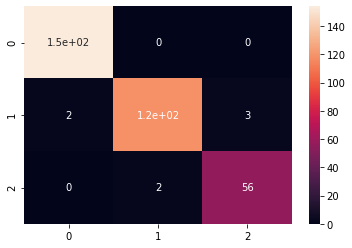

In [ ]:
# confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True)
print(report)
print("Accuracy Score of SVC:", acc*100,"%")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
# Perform classification with MultinomialNB
clf = BernoulliNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

# Perform classification with SVM, kernel=rbf
classifier_rbf = svm.SVC()
classifier_rbf.fit(X_train, y_train)
prediction_rbf = classifier_rbf.predict(X_test)
    
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(X_train, y_train)
prediction_linear = classifier_linear.predict(X_test)
  
# Perform classification with SVM, kernel=linear
classifier_liblinear = svm.LinearSVC(max_iter=10000)
classifier_liblinear.fit(X_train, y_train)
prediction_liblinear = classifier_liblinear.predict(X_test)

In [ ]:
# Print results in a nice table for MultinomialNB
print("\nResults for NaiveBayes (MultinomialNB) ")
print( classification_report(prediction, y_test))
print( str(accuracy_score(prediction, y_test)))


print( prediction[10])
print( y_test[10])

In [ ]:
# Print results in a nice table for MultinomialNB
print("\nResults for NaiveBayes (MultinomialNB) ")
print( classification_report(prediction_rbf, y_test))
print( str(accuracy_score(prediction_rbf, y_test)))


print( prediction[10])
print( y_test[10])


Results for NaiveBayes (MultinomialNB) 
              precision    recall  f1-score   support

         1.0       0.94      1.00      0.97       146
         2.0       1.00      0.89      0.94       136
         3.0       0.92      1.00      0.96        54

    accuracy                           0.96       336
   macro avg       0.95      0.96      0.95       336
weighted avg       0.96      0.96      0.95       336

0.9553571428571429
1.0
1.0


In [ ]:
# Print results in a nice table for MultinomialNB
print("\nResults for NaiveBayes (MultinomialNB) ")
print( classification_report(prediction_linear, y_test))
print( str(accuracy_score(prediction_linear, y_test)))


print( prediction[78])
print( y_test[78])


Results for NaiveBayes (MultinomialNB) 
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       156
         2.0       1.00      1.00      1.00       121
         3.0       1.00      1.00      1.00        59

    accuracy                           1.00       336
   macro avg       1.00      1.00      1.00       336
weighted avg       1.00      1.00      1.00       336

1.0
2.0
2.0


In [ ]:
# Print results in a nice table for MultinomialNB
print("\nResults for NaiveBayes (MultinomialNB) ")
print( classification_report(prediction_liblinear, y_test))
print( str(accuracy_score(prediction_liblinear, y_test)))


print( prediction[78])
print( y_test[78])


Results for NaiveBayes (MultinomialNB) 
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       156
         2.0       0.98      0.99      0.98       119
         3.0       0.98      0.95      0.97        61

    accuracy                           0.99       336
   macro avg       0.99      0.98      0.98       336
weighted avg       0.99      0.99      0.99       336

0.9880952380952381
2.0
2.0
